<a href="https://colab.research.google.com/github/CRPeace/Dojo-food_items_assignment/blob/main/C_Peace_Week3_Food_Items_Predictions_rev_12_30_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Food Item Predictions
##### Cameron Peace

##### Assignment Checklist Part 3 Exploratory Visualizations


For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

* [x] Histogram to view the distributions of various features in your dataset.
* [ ] Boxplot to view statistical summaries of various features in your dataset.
* [x] Heatmap of the correlation between features.

##### Data Background and Data Dictionary

The dataset used in this analysis was originally provided by [Analytics Vidhya](https://datahack.analyticsvidhya.com/) for use in a data analysis [practice competition](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#About).  It includes data on products from the grocery store chain [Big Mart](https://www.bigmart.ae/index.html), which has locations mostly in India and the United Arab Emirates. From [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/): **"The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities."*

* Variable Name: --	Description
* Item_Identifier: --	Unique product ID
* Item_Weight: --	Weight of product
* Item_Fat_Content: --	Whether the product is low fat or regular
* Item_Visibility: --	The percentage of total display area of all products in a store allocated to the particular product
* Item_Type: --	The category to which the product belongs
* Item_MRP: --	Maximum Retail Price (list price) of the product
* Outlet_Identifier: --	Unique store ID
* Outlet_Establishment_Year: --	The year in which store was established
* Outlet_Size: --	The size of the store in terms of ground area covered
* Outlet_Location_Type: --	The type of area in which the store is located
* Outlet_Type: --	Whether the outlet is a grocery store or some sort of supermarket
* Item_Outlet_Sales: --	Sales of the product in the particular store. This is the target variable to be predicted.

### <font color='green'> Loading Data </font>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
df = pd.read_csv('/content/sales_predictions.csv')

In [53]:
display(df.head(), round(df.describe(), 2), df.info(), df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


None

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### <font color='green'>Data Cleaning</font>

In [54]:
df.shape

(8523, 12)

In [55]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [56]:
print(f'There are {df.duplicated().sum()} duplicate rows in the dataset')
df.loc[df.duplicated(), :]

There are 0 duplicate rows in the dataset


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [57]:
# Looks like we have missing values in the "Item_Weight" and "Outlet_Size" columns
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [58]:
# taking a look at other values in the rows with missing weight in case there is a pattern.
df[df['Item_Weight'].isna()]
df[df['Item_Weight'].isna()]['Outlet_Identifier'].value_counts()

OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [59]:
# looks like the missing weights are confined to only 2 stores: 'OUT027' and 'OUT019'
# would consult with subject matter expert, but seems simplest to drop those stores from the dataset since we're missing data from them
# dropping 2 out of 10 stores does take a bite out of the dataset though. We'll lose around 17 percent of the data here.
df['Outlet_Identifier'].value_counts(normalize=True)  

OUT027    0.109703
OUT013    0.109351
OUT049    0.109117
OUT046    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

In [60]:
# This filters out any stores that are not OUT027 or OUT019, since in this case all nulls are coming from these two stores
# Although it makes just as much sense to drop nulls via the "Item_Weight" column \
#     I prefer this way since it makes it clear that data from two stores are problematic and removes all values.
cleaned = df.copy()
cleaned = cleaned[~cleaned['Outlet_Identifier'].isin(['OUT027', 'OUT019'])]

In [61]:
# verifying that we're cleaned for "Item_Weight"
print(cleaned.shape)
print(cleaned.isna().sum())

(7060, 12)
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [62]:
# Now filling all nulls from "Outlet_Size" with 'missing value'
cleaned['Outlet_Size'] = cleaned['Outlet_Size'].fillna('missing value')

In [63]:
# Verifying that there are no more missing values in the whole dataset
cleaned.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [64]:
cleaned.columns # printing out column names to copy

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [65]:

# finding those I want to take a closer look at
my_columns = ['Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for i in my_columns:
  print(i.upper(), '****\n', cleaned[i].value_counts(dropna=False))
  print('**************\n\n')

ITEM_FAT_CONTENT ****
 Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64
**************


ITEM_TYPE ****
 Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64
**************


OUTLET_IDENTIFIER ****
 OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64
**************


OUTLET_ESTABLISHMENT_YEAR ****
 1987    932
1999    930
1997    930
2004    930
2002    929
2009    928
2007 

In [66]:
#Fixing the "Item_Fat_Content" column with apply and a separate function
def fix_fat_label(label):
  if  label== 'low fat':
    return 'Low Fat'
  elif label == 'LF':
    return 'Low Fat'
  elif label == 'reg':
    return 'Regular'
  else:
    return label
    
cleaned.loc[:,'Item_Fat_Content'] = cleaned.loc[:,'Item_Fat_Content'].apply(fix_fat_label)

In [67]:
# checking things
cleaned['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [68]:
# fixing column names
cleaned = cleaned.rename(columns=lambda x: x.lower())

In [69]:
cleaned.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
item_identifier,7060,1555,FDF22,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
item_fat_content,7060,2,Low Fat,4566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_visibility,7060.0,NaN,NaN,NaN,0.063963,0.048625,0.0,0.026768,0.052493,0.092774,0.31109
item_type,7060,16,Fruits and Vegetables,1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_mrp,7060.0,NaN,NaN,NaN,141.240683,62.411888,31.49,94.1436,142.7299,186.024,266.8884
outlet_identifier,7060,8,OUT013,932,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlet_establishment_year,7060.0,NaN,NaN,NaN,2000.490935,6.588984,1987.0,1997.0,2002.0,2007.0,2009.0
outlet_size,7060,4,missing value,2410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outlet_location_type,7060,3,Tier 2,2785,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='green'>Exploratory Visuals</font>

In [70]:
cln_df = cleaned.copy()

In [71]:
cln_df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing value,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
cln_df.sort_values('item_outlet_sales', ascending=False).head(30)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
4961,FDK03,12.600,Regular,0.074339,Dairy,255.5356,OUT017,2007,missing value,Tier 2,Supermarket Type1,9664.7528
997,FDK28,5.695,Low Fat,0.065961,Frozen Foods,259.2646,OUT017,2007,missing value,Tier 2,Supermarket Type1,9275.9256
6409,FDA21,13.650,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276
8039,FDY55,16.750,Low Fat,0.081485,Fruits and Vegetables,258.0988,OUT045,2002,missing value,Tier 2,Supermarket Type1,8994.9580
2216,FDT16,9.895,Regular,0.048761,Frozen Foods,260.5278,OUT045,2002,missing value,Tier 2,Supermarket Type1,8851.1452
2535,FDD44,8.050,Regular,0.078844,Fruits and Vegetables,257.0646,OUT017,2007,missing value,Tier 2,Supermarket Type1,8760.5964
2293,FDR45,10.800,Low Fat,0.029002,Snack Foods,238.6222,OUT045,2002,missing value,Tier 2,Supermarket Type1,8604.7992
4991,NCQ53,17.600,Low Fat,0.018905,Health and Hygiene,234.6590,OUT046,1997,Small,Tier 1,Supermarket Type1,8508.9240


#### **Correlation Check**

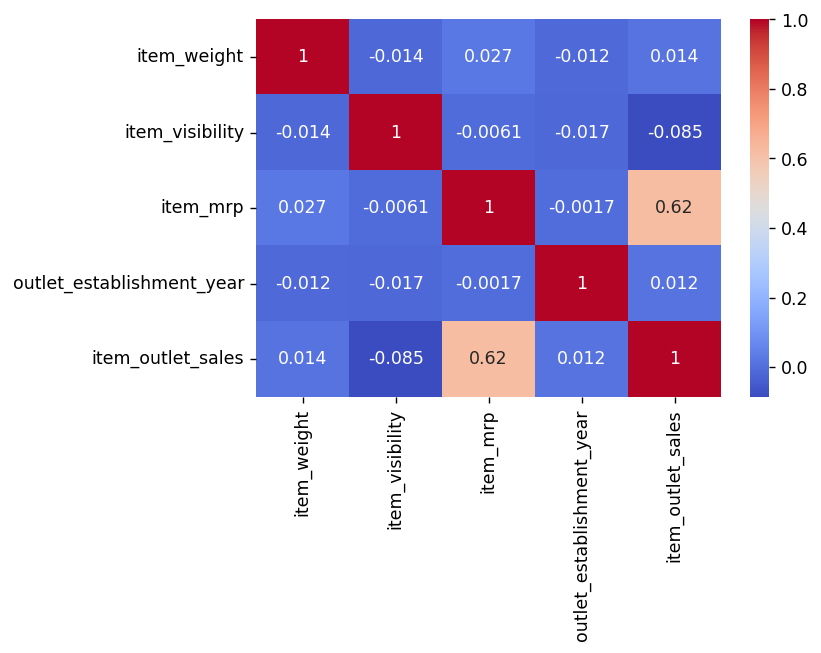

In [86]:
# Taking a look at correlated aspects to the data
plt.figure(figsize= (6, 4), dpi=125)
sns.heatmap(cln_df.corr(), cmap='coolwarm', annot=True);

<font color='blue'><b>Not a whole lot to learn from here, 'item outlet sales' is correlated with 'item mrp' (maximum retail price), which makes sense.  There are not many numeric variables in this dataset. I find it surprising that 'item_visibility' is not correlated with 'item_outlet_sales'.</font>

#### **Exploring Item Visibility**

Definition from the Data Dictionary:
* **Item_Visibility:** -- The percentage of total display area of all products in a store allocated to the particular product 
<br> <br>
<font color='blue'> I'm going to spend some time exploring Item Visibility, despite the fact that we've already learned it is not highly correlated with any other feature from the dataset, I'd like to see what I can glean.

In [74]:
# quick look at lowest and highest visibility items to look for patterns
display(cln_df.sort_values('item_visibility').head(10), cln_df.sort_values('item_visibility').tail(10))

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
3693,NCD07,9.10,Low Fat,0.0,Household,115.4518,OUT017,2007,missing value,Tier 2,Supermarket Type1,2390.8878
2381,FDW34,9.60,Low Fat,0.0,Snack Foods,244.8170,OUT035,2004,Small,Tier 2,Supermarket Type1,4374.3060
5388,FDK52,18.25,Low Fat,0.0,Frozen Foods,224.1062,OUT018,2009,Medium,Tier 3,Supermarket Type2,4965.5364
2376,FDP60,17.35,Low Fat,0.0,Baking Goods,101.9016,OUT013,1987,High,Tier 3,Supermarket Type1,1821.6288
7695,FDR48,11.65,Low Fat,0.0,Baking Goods,149.8024,OUT018,2009,Medium,Tier 3,Supermarket Type2,1821.6288
651,FDY07,11.80,Low Fat,0.0,Fruits and Vegetables,46.5402,OUT010,1998,missing value,Tier 3,Grocery Store,229.7010
5399,FDU04,7.93,Low Fat,0.0,Frozen Foods,121.8414,OUT046,1997,Small,Tier 1,Supermarket Type1,2802.3522
5369,FDN40,5.88,Low Fat,0.0,Frozen Foods,154.2998,OUT046,1997,Small,Tier 1,Supermarket Type1,1999.3974
5400,DRL37,15.50,Low Fat,0.0,Soft Drinks,41.3770,OUT017,2007,missing value,Tier 2,Supermarket Type1,649.1550
2347,FDD02,16.60,Low Fat,0.0,Canned,118.8124,OUT046,1997,Small,Tier 1,Supermarket Type1,2607.2728


,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
5374,FDU27,18.60,Regular,0.287017,Meat,48.8376,OUT010,1998,missing value,Tier 3,Grocery Store,47.9376
4789,FDP19,11.50,Low Fat,0.290430,Fruits and Vegetables,130.6652,OUT010,1998,missing value,Tier 3,Grocery Store,258.3304
6674,FDS12,9.10,Low Fat,0.291439,Baking Goods,126.8362,OUT010,1998,missing value,Tier 3,Grocery Store,125.8362
3488,FDT34,9.30,Low Fat,0.291827,Snack Foods,107.1964,OUT010,1998,missing value,Tier 3,Grocery Store,420.7856
174,FDI32,17.70,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,missing value,Tier 3,Grocery Store,345.5502
5287,FDO24,11.10,Low Fat,0.294949,Baking Goods,159.0604,OUT010,1998,missing value,Tier 3,Grocery Store,792.3020
6576,NCC18,19.10,Low Fat,0.296714,Household,171.8422,OUT010,1998,missing value,Tier 3,Grocery Store,1034.6532
521,FDC15,18.10,Low Fat,0.297884,Dairy,156.7288,OUT010,1998,missing value,Tier 3,Grocery Store,314.2576
2855,NCE31,7.67,Low Fat,0.309390,Household,33.2216,OUT010,1998,missing value,Tier 3,Grocery Store,138.4864
7250,FDT24,12.35,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,missing value,Tier 3,Grocery Store,154.4656


In [75]:
# creating filters for item visibility
only_visible = cln_df[cln_df['item_visibility'] != 0.00]
super_high_vis = cln_df[cln_df['item_visibility'] > .25]
high_vis = cln_df[cln_df['item_visibility'] > .15]
low_vis = only_visible[only_visible['item_visibility'] < .15] # don't want to see the items with no visiblity

Text(0.5, 1.0, 'Very High Visibility')

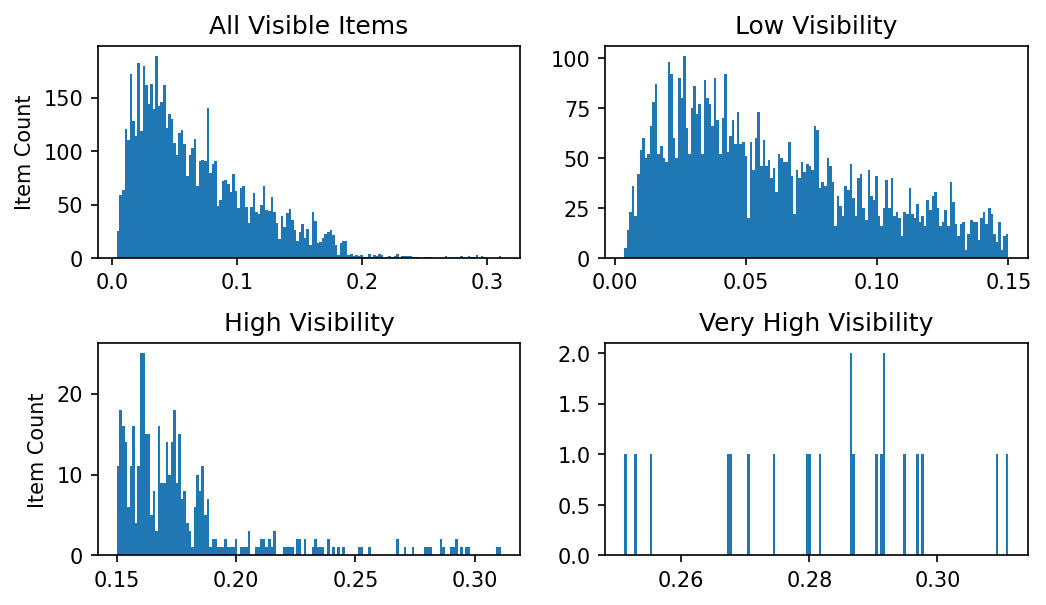

In [76]:
# Most of the items in the stores seem to be low or no visibility, it would be interesting to see if there is a pattern
# Perhaps price drives higher visibility?  Item type?

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 4.5), dpi=150)
plt.subplots_adjust(hspace=.4)
ax1.hist(only_visible['item_visibility'], bins=150);
ax1.set_title('All Visible Items')
ax1.set_ylabel('Item Count')

ax2.hist(low_vis['item_visibility'], bins=150);
ax2.set_title('Low Visibility')

ax3.hist(high_vis['item_visibility'], bins=150);
ax3.set_title('High Visibility')
ax3.set_ylabel('Item Count')

ax4.hist(super_high_vis['item_visibility'], bins=150);
ax4.set_title('Very High Visibility')

<font color='blue'>The item counts distribution has a heavy right skew, which makes sense (there is only so much display surface in the store).  Each filter on visibility is serving as a sort of zoom in on each segment of the visibility distribution.  It will be interesting to explore if any of the very high visibilty products follow a trend and/or there is enough information present in the dataset on which to speculate a casual link. </font>

In [77]:
# looking for patterns, trends
super_high_vis

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,missing value,Tier 3,Grocery Store,345.5502
521,FDC15,18.100,Low Fat,0.297884,Dairy,156.7288,OUT010,1998,missing value,Tier 3,Grocery Store,314.2576
1311,FDV28,16.100,Regular,0.267353,Frozen Foods,34.9558,OUT010,1998,missing value,Tier 3,Grocery Store,67.9116
1496,NCJ17,7.680,Low Fat,0.255348,Health and Hygiene,84.4224,OUT010,1998,missing value,Tier 3,Grocery Store,170.4448
1651,FDR43,18.200,Low Fat,0.270300,Fruits and Vegetables,38.3190,OUT010,1998,missing value,Tier 3,Grocery Store,109.8570
1841,NCJ18,12.350,Low Fat,0.274405,Household,117.1124,OUT010,1998,missing value,Tier 3,Grocery Store,355.5372
2855,NCE31,7.670,Low Fat,0.309390,Household,33.2216,OUT010,1998,missing value,Tier 3,Grocery Store,138.4864
3488,FDT34,9.300,Low Fat,0.291827,Snack Foods,107.1964,OUT010,1998,missing value,Tier 3,Grocery Store,420.7856
4530,FDZ16,16.850,Regular,0.267566,Frozen Foods,194.1478,OUT010,1998,missing value,Tier 3,Grocery Store,1162.4868
4789,FDP19,11.500,Low Fat,0.290430,Fruits and Vegetables,130.6652,OUT010,1998,missing value,Tier 3,Grocery Store,258.3304


In [78]:
# Looking at a possible pattern in greater depth
super_high_vis['item_fat_content'].value_counts(normalize=True)

Low Fat    0.636364
Regular    0.363636
Name: item_fat_content, dtype: float64

<font color='blue'>Exploring a little more leads me to speculate on two potential causes for the high visibility values:
* **The high visibility values represent erroneous values in the dataset, since all products with visibility score exceeding 0.25 are tied to a specific outlet/store (OUT010).  It does seem suspect that a full 1/4 (or greater!) of all display area within a store is dedicated to 1 product**.  
* **However, OUT010 represents the only "Grocery Store" type outlet in the dataset, so it may be that the store is physically much smaller and 1/4 of all display area would make sense, I would need to consult with a subject matter expert**.  

If I were to spend more time on this facet of the data, I would attempt to find correlations between visibility and other attributes.  The intial heatmap is not revealing a correlation, but there may be subsets within ranges of visibility scores that show trends. </font>

#### Exploring Item Types

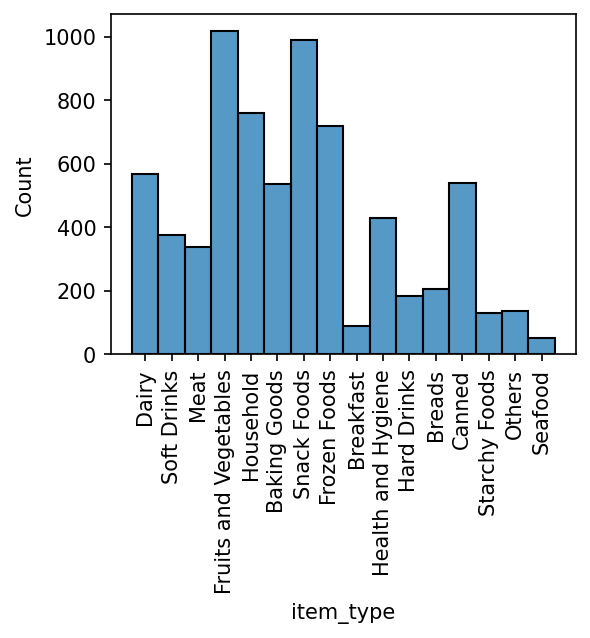

In [79]:
plt.figure(figsize=(4,3), dpi=150)
sns.histplot(cln_df['item_type']);
plt.xticks(rotation=90);

<font color='blue'> Not a whole lot of surprises here.  Here are some observations: 
* **The "Fruits and Vegetables" count seems quite large, may reflect the regional variety of species, combined with seasonality. In other words, there may be a greater number of specific products that fit into this category**
* **Some categories could probably be combined, it is hard to know where the dividing lines are without more information. e.g. Starchy Foods seem to have overlap with Snacks, Baking Goods, Breads, etc.**
* **It would be interesting to see if these counts varied by specific store, perhaps revealing regional trends and preferences.**
* **The counts may also vary based on the type of market.**

It would be interesting to definitively learn where these outlets are located geographically. </font>

#### Exploring Outlet Types

<font color='blue'> In this section I will be looking at what effect Outlet Type has on the other categorical variables in the dataset

In [80]:
# grabbing columns to copy/paste from
cln_df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

In [81]:
# These are categorical variables I will compare between different outlet types.
features = ['item_fat_content',
       'item_type', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type']

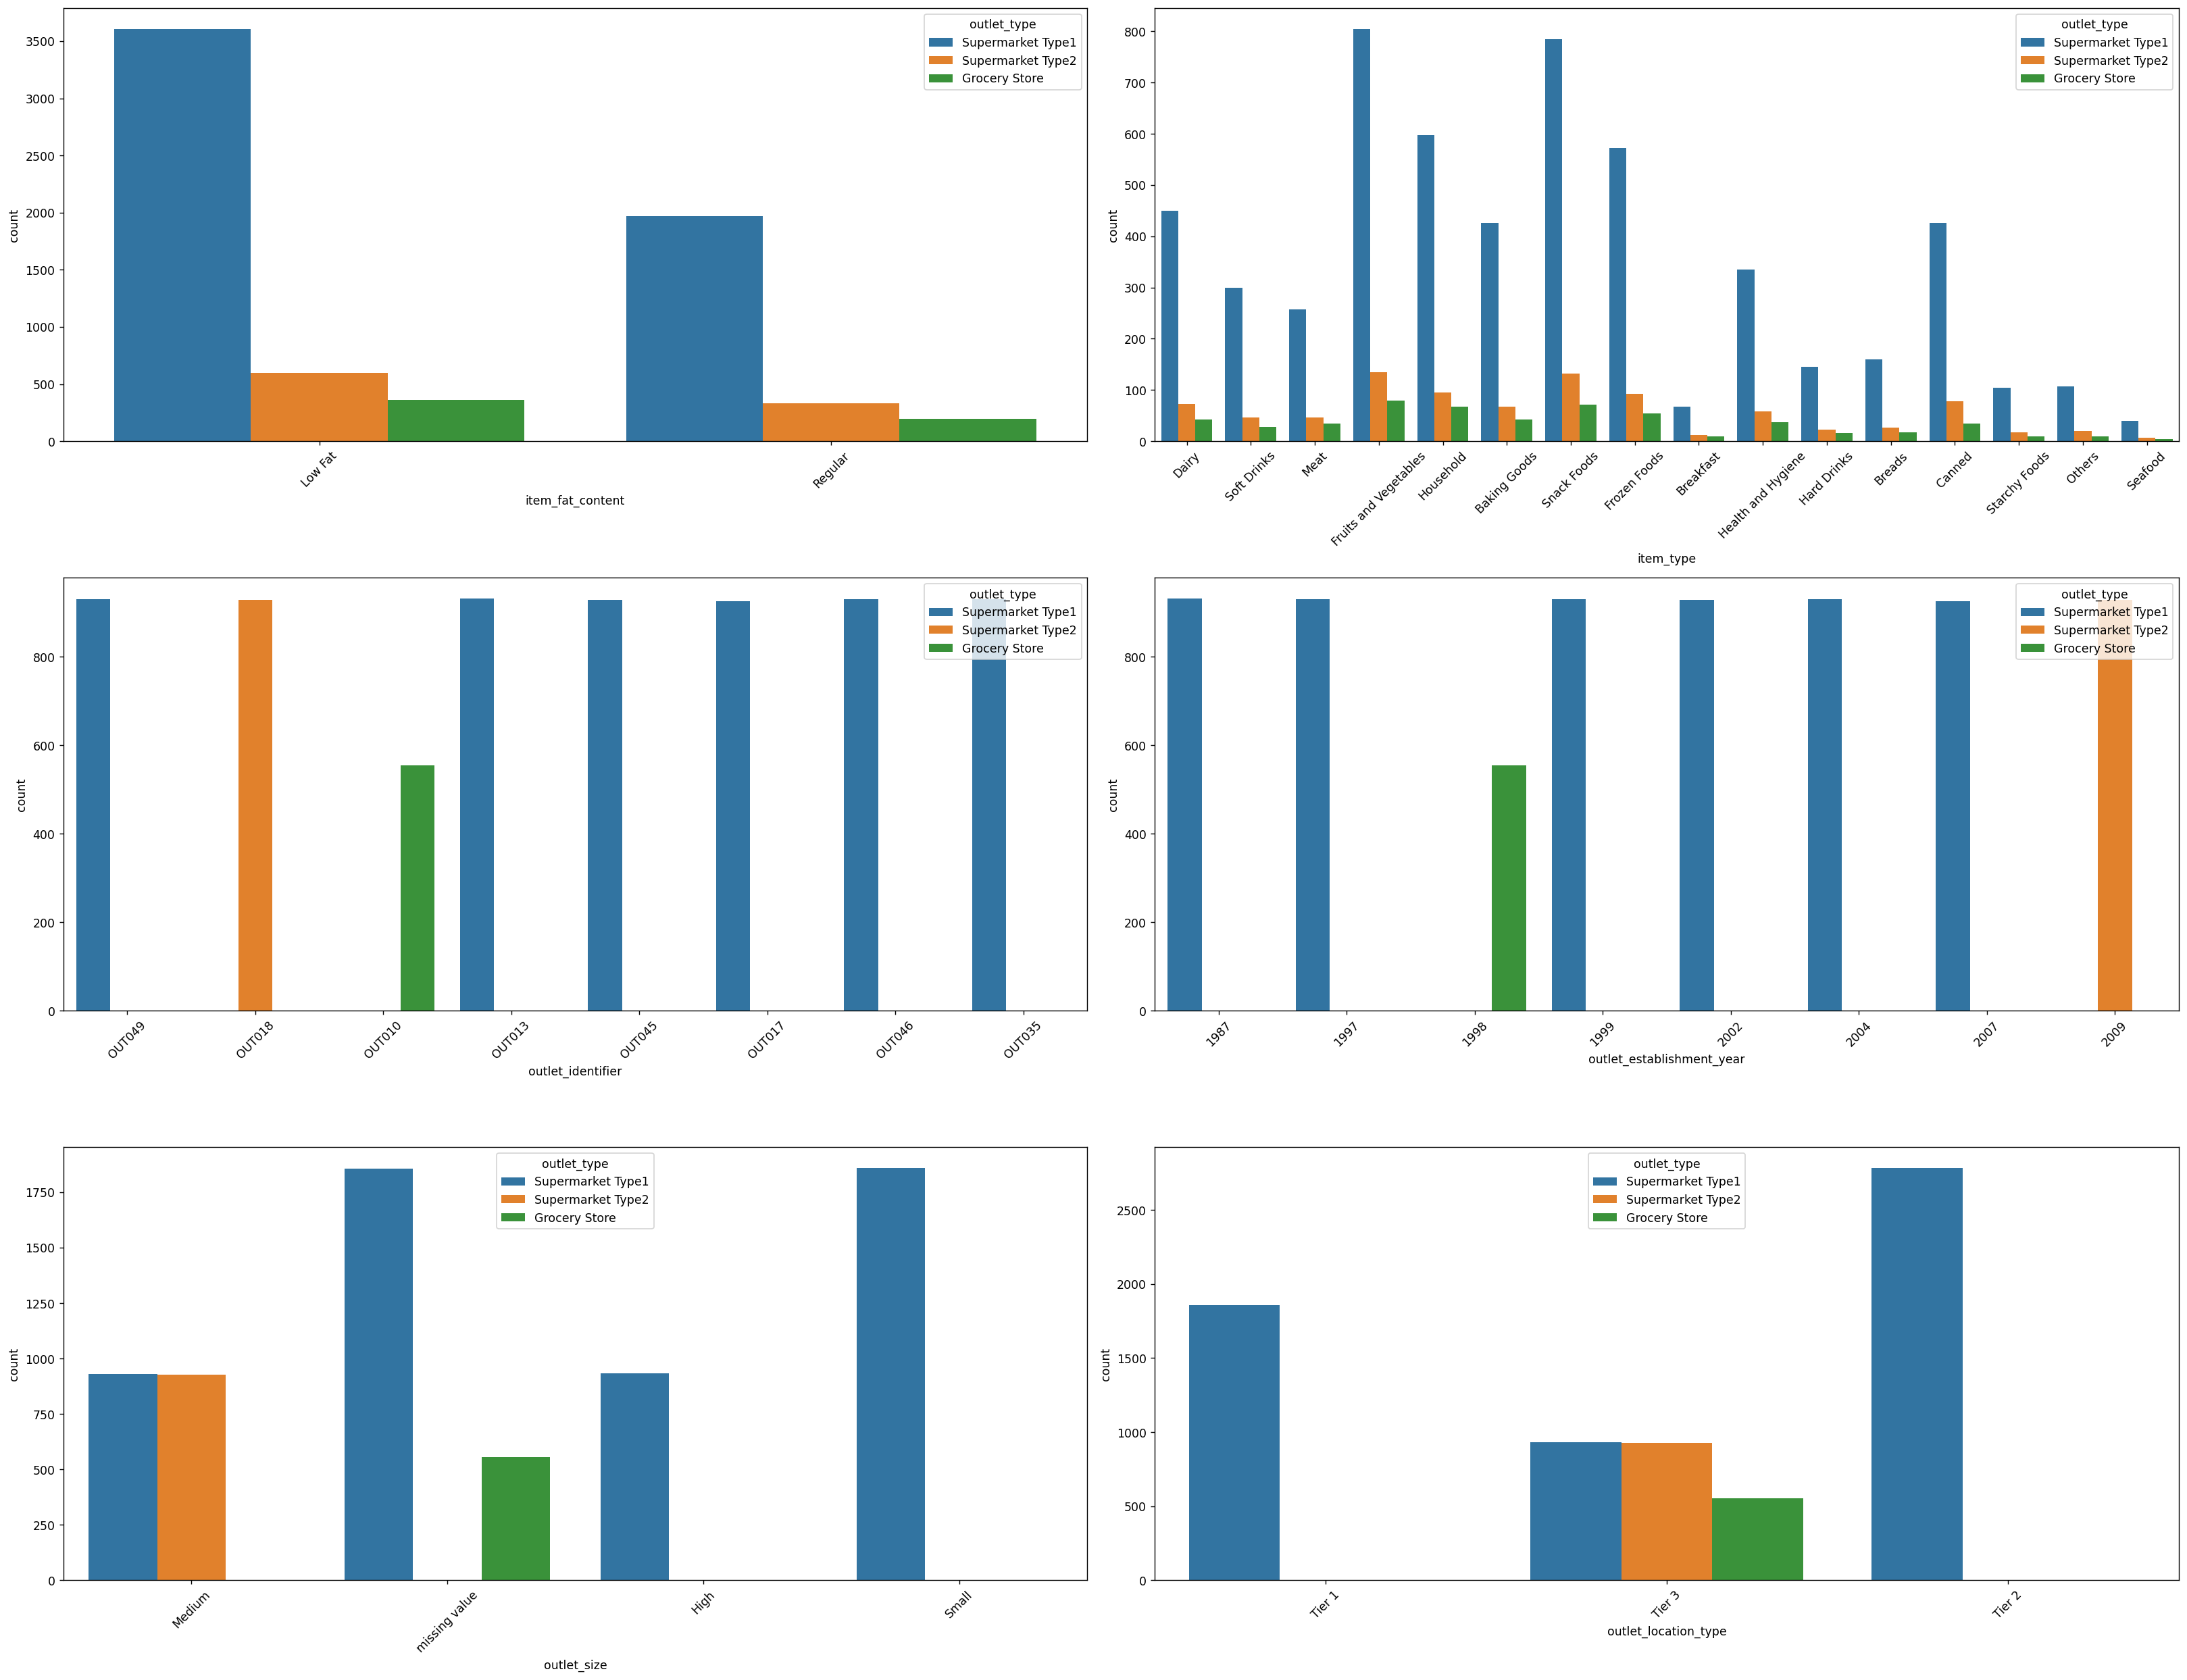

In [82]:
# This code was modeled after a youtube video after searching for ways to use subplots and for loops
# https://www.youtube.com/watch?v=4DnWYK88-E4&ab_channel=SessionWithSumit
plt.figure(figsize=(26, 20), dpi = 125)
for i, v in enumerate(features, 1):
  plt.subplot(3, 2, i)
  sns.countplot(x = v, hue= 'outlet_type', data=cln_df);
  plt.xticks(rotation=45)
  plt.tight_layout()

<font color='blue'> I see very few avenues worth exploring here, I think the main lesson from these visualizations is how dominant the 'Supermarket Type1' Outlet Types are in this dataset.  The lack of Grocery Stores and Type2 outlets make this a difficult aspect of the data to explore. </font>

#### Exploring Item Outlet Sales

<font color='blue'> Here we will look at how various aspects of the dataset are affecting item_outlet_sales

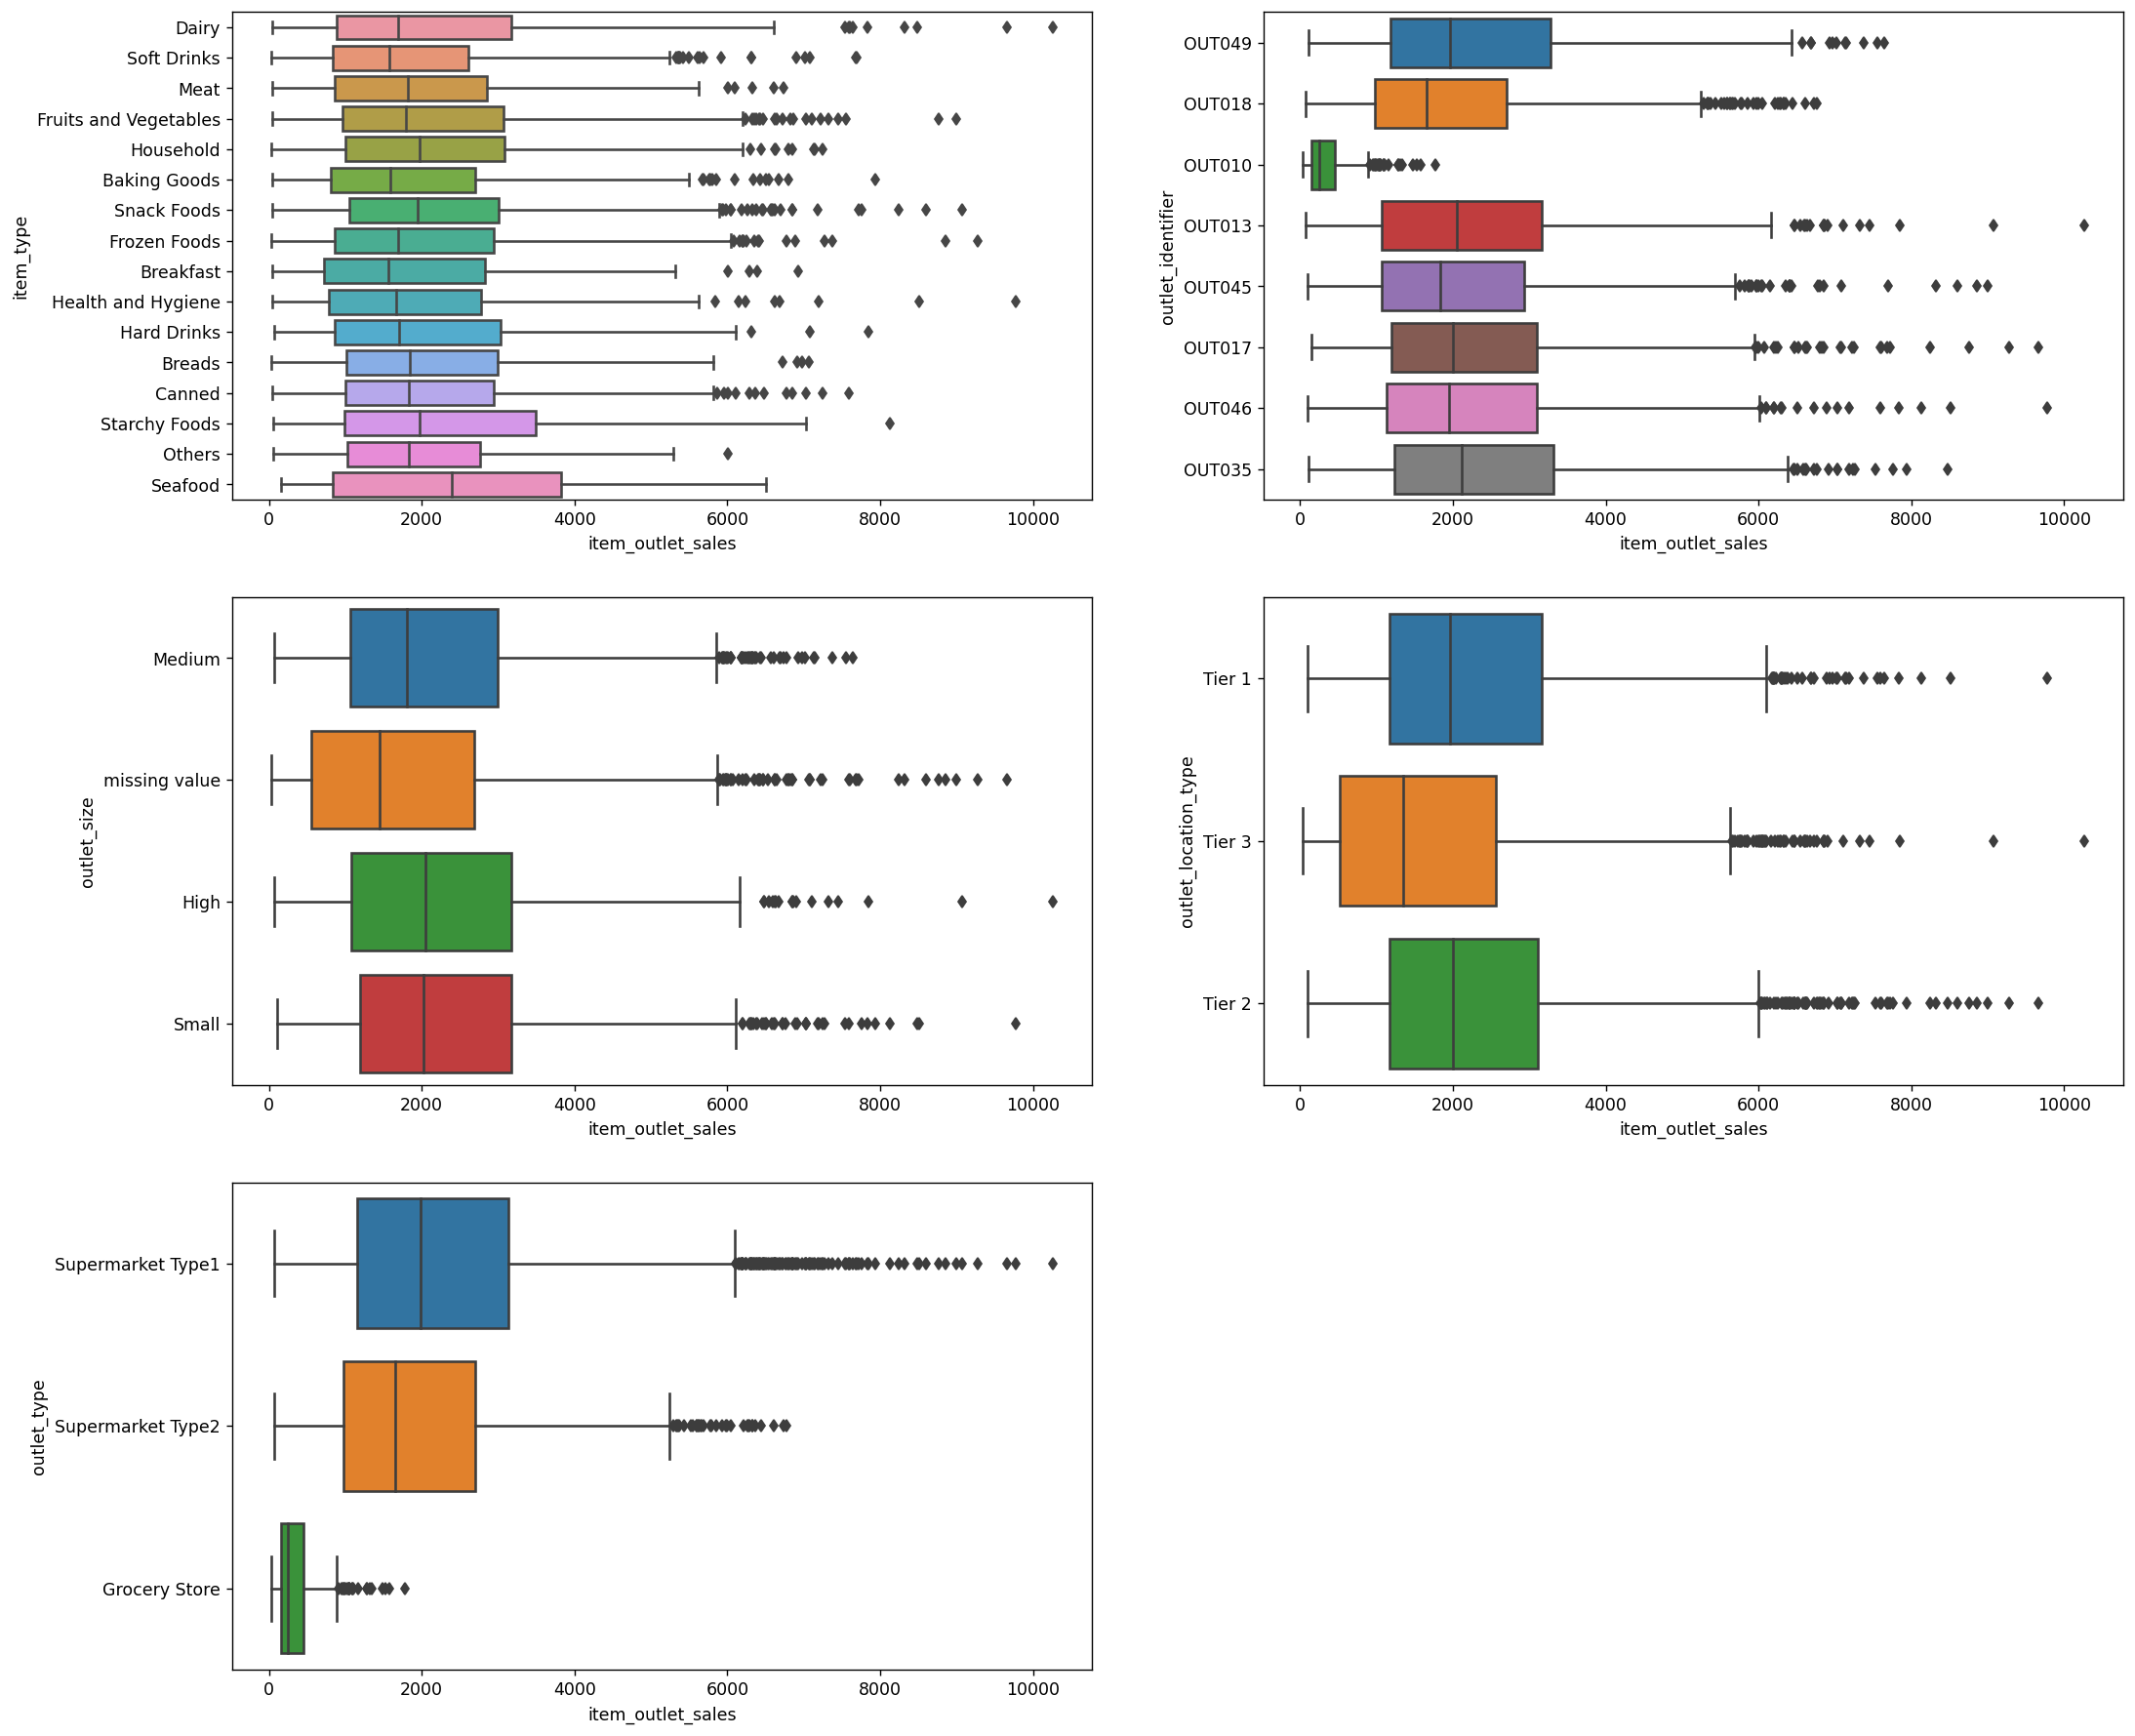

In [83]:
features = ['item_type', 'outlet_identifier', 'outlet_size', 'outlet_location_type', 'outlet_type']

plt.figure(figsize=(20, 18), dpi=125)
for i, feature in enumerate(features, 1):
  plt.subplot(3, 2, i)
  sns.boxplot(y= feature, x='item_outlet_sales', data=cln_df);

<font color='blue'> Some of these boxplots are more useful than others.  Here are some observations:
* **It's clear the 1 grocery store in the dataset is an outlier and is outcompeted by the supermarkets.**
* **Seafood sales seem to be a have a high median value for sales.**
* **Aside from the grocery store, the individuals are fairly closely matched.**
* **Outlet size does not seem to make a difference on sales**
* **Tier 3 outlets appear to be out competed by Tiers 1 and 2**
* **The outlet type with the highest median value sales appears to be the Type1 Supermarket.**

### <font color='green'>Explanatory Visuals</font>